In [1]:
#Author: Vinay Maruri

#Problem Set 2: Economics 121
#Instead of writing this problem set out by hand, I have chosen to complete the problem set in Python. Questions 5 and 6 were answered using TA Chris Campos's STATA code provided in section.  

In [2]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path


# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

In [3]:
excel_file = 'Anne.xls'
chocolates = pd.read_excel(excel_file)

In [4]:
chocolates

,price ($),dayofweek,timestamp,"mobile (1=mobile, 0=not)","Safari (1=yes, 0=not)","Buy (1=buy, 0=not buy)"
0,1.3,Mon,17:42,1,0,1
1,1.9,Tue,13:36,0,1,0
2,0.5,Mon,09:31,0,0,1
3,1.1,Fri,14:22,1,0,1
4,0.7,Tue,11:56,0,0,1
5,0.6,Wed,06:19,0,0,1
6,0.8,Mon,13:44,1,0,1
7,1.1,Wed,23:12,0,0,0
8,1.2,Thu,22:16,0,0,0
9,1.5,Thu,17:28,0,0,0


In [5]:
chocolates.head()

,price ($),dayofweek,timestamp,"mobile (1=mobile, 0=not)","Safari (1=yes, 0=not)","Buy (1=buy, 0=not buy)"
0,1.3,Mon,17:42,1,0,1
1,1.9,Tue,13:36,0,1,0
2,0.5,Mon,09:31,0,0,1
3,1.1,Fri,14:22,1,0,1
4,0.7,Tue,11:56,0,0,1


In [6]:
chocolates['dayofweek'] = chocolates['dayofweek'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})

In [7]:
chocolates.groupby('dayofweek').head()

,price ($),dayofweek,timestamp,"mobile (1=mobile, 0=not)","Safari (1=yes, 0=not)","Buy (1=buy, 0=not buy)"
0,1.3,0,17:42,1,0,1
1,1.9,1,13:36,0,1,0
2,0.5,0,09:31,0,0,1
3,1.1,4,14:22,1,0,1
4,0.7,1,11:56,0,0,1
5,0.6,2,06:19,0,0,1
6,0.8,0,13:44,1,0,1
7,1.1,2,23:12,0,0,0
8,1.2,3,22:16,0,0,0
9,1.5,3,17:28,0,0,0


1) Draw the monthly demand curve for Anne’ chocolates.

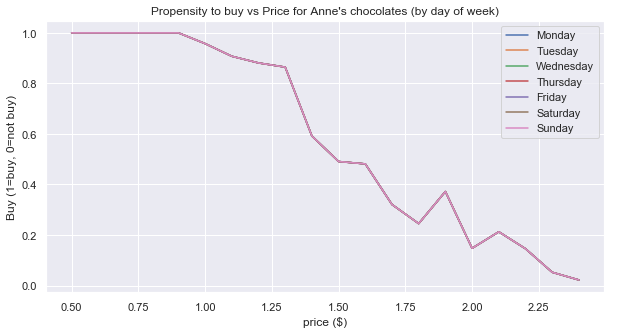

In [8]:
plt.figure(figsize = (10,5))

newdf0 = chocolates.loc[chocolates['dayofweek'] == 0]
ax = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = newdf0, ci = None)

newdf1 = chocolates.loc[chocolates['dayofweek'] == 1]
ay = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = newdf1, ci = None)

newdf2 = chocolates.loc[chocolates['dayofweek'] == 2]
az = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = newdf2, ci = None)

newdf3 = chocolates.loc[chocolates['dayofweek'] == 3]
aa = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = newdf3, ci = None)

newdf4 = chocolates.loc[chocolates['dayofweek'] == 4]
ab = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = newdf4, ci = None)

newdf5 = chocolates.loc[chocolates['dayofweek'] == 5]
ac = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = newdf5, ci = None)

newdf6 = chocolates.loc[chocolates['dayofweek'] == 6]
ad = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = newdf6, ci = None)

plt.title("Propensity to buy vs Price for Anne's chocolates (by day of week)")
plt.legend(labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


#This is a plot of monthly demand curves for Anne's Chocolates, separated by day of week.

Text(0.5,1,"Propensity to buy vs Price for Anne's chocolates (aggregated)")

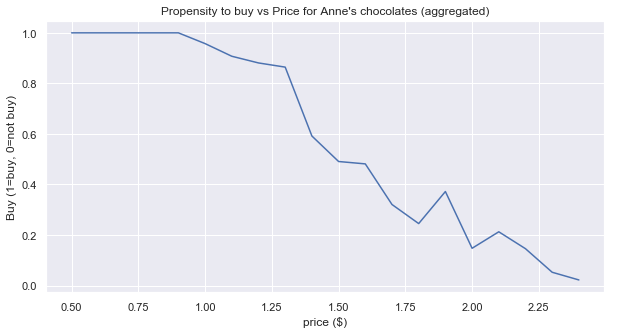

In [9]:
plt.figure(figsize = (10,5))

ax = sns.lineplot(x = chocolates['price ($)'], y = chocolates['Buy (1=buy, 0=not buy)'], data = chocolates, ci = None)

plt.title("Propensity to buy vs Price for Anne's chocolates (aggregated)")

#This is a plot of Propensity to buy vs Price for Anne's chocolates, with all price and buy data aggregated, and not separated by day of week. 

Remark: There appears to be no difference between day of week with regards to the propensity to buy Anne's Chocolates. There also appears to be no difference between the aggregated curve and the curves separated by day of week. 

In [10]:
aggchoc = chocolates.groupby('price ($)')
aggchoc = aggchoc.agg({'Buy (1=buy, 0=not buy)': 'sum'})
aggchoc['price ($)'] = aggchoc.index
aggchoc
#Note: The buy column here is actually quantity bought- I aggregated the 1's and 0's to form the total number of Anne's chocolates bought at a given price.

,"Buy (1=buy, 0=not buy)",price ($)
price ($),,
0.5,60,0.5
0.6,41,0.6
0.7,58,0.7
0.8,50,0.8
0.9,47,0.9
1.0,45,1.0
1.1,49,1.1
1.2,37,1.2
1.3,51,1.3


Text(0.5,0,'Price ($)')

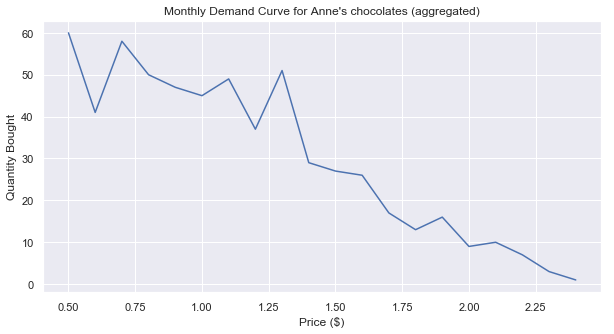

In [11]:
plt.figure(figsize = (10,5))

ax = sns.lineplot(x = aggchoc['price ($)'], y = aggchoc['Buy (1=buy, 0=not buy)'], data = aggchoc, ci = None)

plt.title("Monthly Demand Curve for Anne's chocolates (aggregated)")

plt.ylabel('Quantity Bought')
plt.xlabel('Price ($)')

#This is a plot of Monthly demand curve for Anne's chocolates, with all price and buy data aggregated, and not separated by day of week. 

2) What would be the uniform price that you would advise Anne to charge?

In [12]:
aggchoc['revenue'] = aggchoc['Buy (1=buy, 0=not buy)'] * aggchoc['price ($)']
aggchoc['cost'] = aggchoc['Buy (1=buy, 0=not buy)'] * 1
aggchoc['profit'] = aggchoc['revenue'] - aggchoc['cost']
aggchoc
#Note: It is specified in the problem that it costs Anne $1 to make chocolate. I am interpreting that as marginal cost.

,"Buy (1=buy, 0=not buy)",price ($),revenue,cost,profit
price ($),,,,,
0.5,60,0.5,30.000000,60,-30.000000
0.6,41,0.6,24.600001,41,-16.399999
0.7,58,0.7,40.599999,58,-17.400001
0.8,50,0.8,40.000001,50,-9.999999
0.9,47,0.9,42.299999,47,-4.700001
1.0,45,1.0,45.000000,45,0.000000
1.1,49,1.1,53.900001,49,4.900001
1.2,37,1.2,44.400002,37,7.400002
1.3,51,1.3,66.299998,51,15.299998


It appears that Anne's profit is maximized when price is set at $1.30. Hence, this is the uniform price I would advise Anne to charge.

3) Draw the demand curve that corresponds to customers who visit her site on
Mondays. Draw the demand curve that corresponds to customers who visit her site
on Saturdays.

Text(0.5,0,'Price ($)')

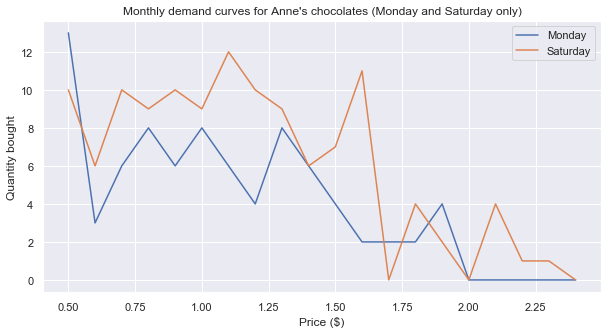

In [13]:
plt.figure(figsize = (10, 5))

disaggchocmon = chocolates.loc[chocolates['dayofweek'] == 0]
disaggchocsat = chocolates.loc[chocolates['dayofweek'] == 5]

disaggchocsat = disaggchocsat.groupby('price ($)').agg({'Buy (1=buy, 0=not buy)': 'sum'})
disaggchocmon = disaggchocmon.groupby('price ($)').agg({'Buy (1=buy, 0=not buy)': 'sum'})

disaggchocmon['price'] = disaggchocmon.index
disaggchocsat['price'] = disaggchocsat.index

ax = sns.lineplot(x='price', y='Buy (1=buy, 0=not buy)', data = disaggchocmon)
ay = sns.lineplot(x='price', y='Buy (1=buy, 0=not buy)', data = disaggchocsat)

plt.title("Monthly demand curves for Anne's chocolates (Monday and Saturday only)")
plt.legend(labels = ['Monday', 'Saturday'])
plt.ylabel('Quantity bought')
plt.xlabel('Price ($)')

4) Suppose that you decide to advise Anne to set different prices on different day
of the week. What price would you recommend her to set on different days of the
week?

In [14]:
disaggchoctue = chocolates.loc[chocolates['dayofweek'] == 1]
disaggchocwed = chocolates.loc[chocolates['dayofweek'] == 2]
disaggchocthu = chocolates.loc[chocolates['dayofweek'] == 3]
disaggchocfri = chocolates.loc[chocolates['dayofweek'] == 4]
disaggchocsun = chocolates.loc[chocolates['dayofweek'] == 6]

disaggchoctue = disaggchoctue.groupby('price ($)').agg({'Buy (1=buy, 0=not buy)': 'sum'})
disaggchocwed = disaggchocwed.groupby('price ($)').agg({'Buy (1=buy, 0=not buy)': 'sum'})
disaggchocthu = disaggchocthu.groupby('price ($)').agg({'Buy (1=buy, 0=not buy)': 'sum'})
disaggchocfri = disaggchocfri.groupby('price ($)').agg({'Buy (1=buy, 0=not buy)': 'sum'})
disaggchocsun = disaggchocsun.groupby('price ($)').agg({'Buy (1=buy, 0=not buy)': 'sum'})

disaggchoctue['price'] = disaggchoctue.index
disaggchocwed['price'] = disaggchocwed.index
disaggchocthu['price'] = disaggchocthu.index
disaggchocfri['price'] = disaggchocfri.index
disaggchocsun['price'] = disaggchocsun.index

In [15]:
disaggchocmon['revenue'] = disaggchocmon['Buy (1=buy, 0=not buy)'] * disaggchocmon['price']
disaggchocmon['cost'] = disaggchocmon['Buy (1=buy, 0=not buy)'] * 1
disaggchocmon['profit'] = disaggchocmon['revenue'] - disaggchocmon['cost']

disaggchocsat['revenue'] = disaggchocsat['Buy (1=buy, 0=not buy)'] * disaggchocsat['price']
disaggchocsat['cost'] = disaggchocsat['Buy (1=buy, 0=not buy)'] * 1
disaggchocsat['profit'] = disaggchocsat['revenue'] - disaggchocsat['cost']

disaggchoctue['revenue'] = disaggchoctue['Buy (1=buy, 0=not buy)'] * disaggchoctue['price']
disaggchoctue['cost'] = disaggchoctue['Buy (1=buy, 0=not buy)'] * 1
disaggchoctue['profit'] = disaggchoctue['revenue'] - disaggchoctue['cost']

disaggchocwed['revenue'] = disaggchocwed['Buy (1=buy, 0=not buy)'] * disaggchocwed['price']
disaggchocwed['cost'] = disaggchocwed['Buy (1=buy, 0=not buy)'] * 1
disaggchocwed['profit'] = disaggchocwed['revenue'] - disaggchocwed['cost']

disaggchocthu['revenue'] = disaggchocthu['Buy (1=buy, 0=not buy)'] * disaggchocthu['price']
disaggchocthu['cost'] = disaggchocthu['Buy (1=buy, 0=not buy)'] * 1
disaggchocthu['profit'] = disaggchocthu['revenue'] - disaggchocthu['cost']

disaggchocfri['revenue'] = disaggchocfri['Buy (1=buy, 0=not buy)'] * disaggchocfri['price']
disaggchocfri['cost'] = disaggchocfri['Buy (1=buy, 0=not buy)'] * 1
disaggchocfri['profit'] = disaggchocfri['revenue'] - disaggchocfri['cost']

disaggchocsun['revenue'] = disaggchocsun['Buy (1=buy, 0=not buy)'] * disaggchocsun['price']
disaggchocsun['cost'] = disaggchocsun['Buy (1=buy, 0=not buy)'] * 1
disaggchocsun['profit'] = disaggchocsun['revenue'] - disaggchocsun['cost']

In [16]:
disaggchocmon

,"Buy (1=buy, 0=not buy)",price,revenue,cost,profit
price ($),,,,,
0.5,13,0.5,6.5,13,-6.5
0.6,3,0.6,1.8,3,-1.2
0.7,6,0.7,4.2,6,-1.8
0.8,8,0.8,6.4,8,-1.6
0.9,6,0.9,5.4,6,-0.6
1.0,8,1.0,8.0,8,0.0
1.1,6,1.1,6.6,6,0.6
1.2,4,1.2,4.8,4,0.8
1.3,8,1.3,10.4,8,2.4


In [17]:
disaggchoctue

,"Buy (1=buy, 0=not buy)",price,revenue,cost,profit
price ($),,,,,
0.5,10,0.5,5.0,10,-5.0
0.6,5,0.6,3.0,5,-2.0
0.7,8,0.7,5.6,8,-2.4
0.8,11,0.8,8.8,11,-2.2
0.9,8,0.9,7.2,8,-0.8
1.0,8,1.0,8.0,8,0.0
1.1,6,1.1,6.6,6,0.6
1.2,3,1.2,3.6,3,0.6
1.3,6,1.3,7.8,6,1.8


In [18]:
disaggchocwed

,"Buy (1=buy, 0=not buy)",price,revenue,cost,profit
price ($),,,,,
0.5,6,0.5,3.000000,6,-3.000000
0.6,6,0.6,3.600000,6,-2.400000
0.7,10,0.7,7.000000,10,-3.000000
0.8,5,0.8,4.000000,5,-1.000000
0.9,7,0.9,6.300000,7,-0.700000
1.0,3,1.0,3.000000,3,0.000000
1.1,7,1.1,7.700000,7,0.700000
1.2,7,1.2,8.400000,7,1.400000
1.3,15,1.3,19.499999,15,4.499999


In [19]:
disaggchocthu

,"Buy (1=buy, 0=not buy)",price,revenue,cost,profit
price ($),,,,,
0.5,7,0.5,3.5,7,-3.5
0.6,9,0.6,5.4,9,-3.6
0.7,11,0.7,7.7,11,-3.3
0.8,8,0.8,6.4,8,-1.6
0.9,6,0.9,5.4,6,-0.6
1.0,7,1.0,7.0,7,0.0
1.1,8,1.1,8.8,8,0.8
1.2,5,1.2,6.0,5,1.0
1.3,5,1.3,6.5,5,1.5


In [20]:
disaggchocfri

,"Buy (1=buy, 0=not buy)",price,revenue,cost,profit
price ($),,,,,
0.5,7,0.5,3.5,7,-3.5
0.6,7,0.6,4.2,7,-2.8
0.7,6,0.7,4.2,6,-1.8
0.8,4,0.8,3.2,4,-0.8
0.9,7,0.9,6.3,7,-0.7
1.0,8,1.0,8.0,8,0.0
1.1,9,1.1,9.9,9,0.9
1.2,7,1.2,8.4,7,1.4
1.3,2,1.3,2.6,2,0.6


In [21]:
disaggchocsat

,"Buy (1=buy, 0=not buy)",price,revenue,cost,profit
price ($),,,,,
0.5,10,0.5,5.0,10,-5.0
0.6,6,0.6,3.6,6,-2.4
0.7,10,0.7,7.0,10,-3.0
0.8,9,0.8,7.2,9,-1.8
0.9,10,0.9,9.0,10,-1.0
1.0,9,1.0,9.0,9,0.0
1.1,12,1.1,13.2,12,1.2
1.2,10,1.2,12.0,10,2.0
1.3,9,1.3,11.7,9,2.7


In [22]:
disaggchocsun

,"Buy (1=buy, 0=not buy)",price,revenue,cost,profit
price ($),,,,,
0.5,7,0.5,3.5,7,-3.5
0.6,5,0.6,3.0,5,-2.0
0.7,7,0.7,4.9,7,-2.1
0.8,5,0.8,4.0,5,-1.0
0.9,3,0.9,2.7,3,-0.3
1.0,2,1.0,2.0,2,0.0
1.1,1,1.1,1.1,1,0.1
1.2,1,1.2,1.2,1,0.2
1.3,6,1.3,7.8,6,1.8


On Monday, I would suggest setting the price to \$1.90. On Tuesday, I would suggest \$1.70. On Wednesday, I would suggest \$1.30. On Thursday, I would suggest \$1.70. On Friday, I would suggest \$1.80. On Saturday, I would suggest setting the price to \$1.60. On Sunday, I would suggest \$2.30. These are all the prices that produce the highest possible profits on each day.

5) (**Requires knowledge in econometrics, optional) Specify demand as a function of observable customer characteristics and estimate it.Make sure what demand model you are estimating.

Please see attached STATA logs. It appears that we can specify demand as a function of observable characteristics as follows: 

Q = a - bP + U; where Q is quantity bought (identified as Buy1buy0notbuy), a is a constant, b measures price sensitivity. P is a randomly assigned price for Anne's product, and U is an error term. There are two different demand models that occur through this method: one for safari users and one for mobile users. 

I estimate that a = 63.91997, and b = -31.30259. Interpreting this, for every dollar price is increased, 31.302 units less of Anne's product are bought. This implies that users very price sensitive since this is quite a decrease.

What is also interesting is that the t-score for the mobile user coefficient implies that it is not statistically significant at a 95% confidence level. With 19 degrees of freedom (number of observations is 20), this t-score of 0.36 corresponds to a p-value of 0.727, which is not significant at p < .05. (Assuming a one-tailed hypothesis). The Safari coefficient is also not statistically significant, since its t score is 0.93 and its p-value is 0.369, which is also larger than 0.05. 

Since the mobile and safari coefficients are not statistically significantly different from zero, it appears that my demand model has only one significant coefficient: price sensitivity. Hence, this is why my aggregated model excludes variables for safari or mobile users.  

6) (**Requires knowledge in econometrics, optional) Based on estimated demand, derive   the   optimal   pricing   strategy   as   a   function   of   observable   customer characteristics.What  are  the  characteristics  that  should  make Anne  charge the highestprices?  What  are  the  characteristics  that  should  make Anne  charge  the lowest prices?

Given that my only significant coefficient for the aggregated model was price sensitivity, I cannot answer this question for an aggregated model. 

However, for individual decisions, I can model a pricing strategy as follows:
First, I specify a demand model: 
Buy = a + bP + cX + u; where a is a constant, u is the error term, b measures price sensitivity, and c measures other factors related to buying (such as being a safari or mobile user). 

Running the logistic regression, I yield the following result: 
a = 11.95399, b = -9.464326, and c has the following significant coefficients (at p = 0.05): saturday = 1.722478, sunday = 1.288354, safari = 2.277246, and mobile = 6.797639. 
Coefficents for Monday, Thursday, Tuesday, and Wednesday are excluded because they are not statistically signficantly different from zero. The coefficient for Friday was not calculated likely due to a user by me. 

Characteristics that should make Anne charge the highest prices include if the day of week is Saturday or Sunday (since it appears that more of Anne's product is bought on those days), or if the customer is a mobile user (since it appears that this binary variable contributes significantly to Anne's sales). She should charge higher prices based on these characteristics since these seem to be robust categories of buyers who appear ready to buy the product and are not as sensitive to price since there is a positive effect on buying from one of these categories being true. 

The characteristic that should make Anne charge lower prices is the price sensitivity coefficient. Since it is highly negative in the logit model, this implies that a generic customer to Anne's business is very price sensitive, meaning that Anne has to be careful with regards to setting price and she should err on the side of caution and charge lower prices more often than not. 
